In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

f(3.0)

20.0

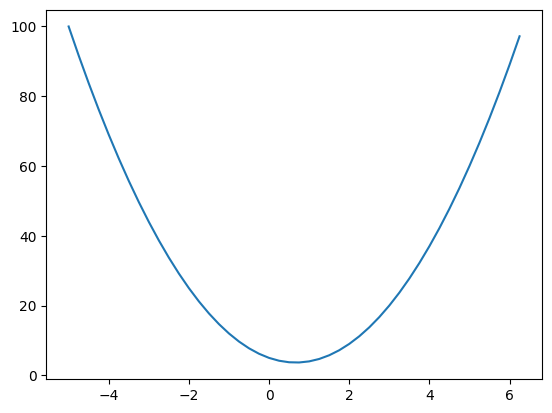

In [3]:
xs = np.arange(-5, 6.5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [4]:
class Value:
    def __init__(
        self,
        data: float = 0.0,
        label: str = "",
        _children: tuple = (),
        _op: str = "",
    ) -> None:
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        self.grad = 0.0

    def __repr__(self):
        return f"Value(data={self.data}, label='{self.label}')"

    def __add__(self, other):
        return Value(data=self.data + other.data, _children=(self, other), _op="+")

    def __mul__(self, other):
        return Value(data=self.data * other.data, _children=(self, other), _op="*")


In [5]:

from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [6]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0, label='L')

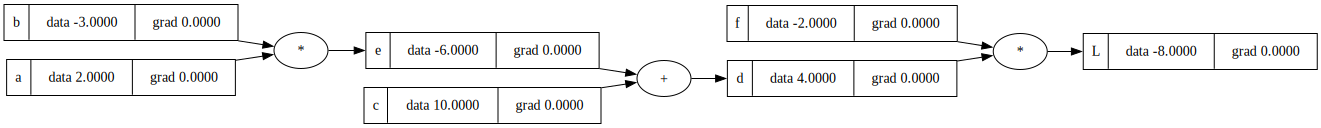

In [7]:
draw_dot(L)

In [21]:
import torch as pt

def init_vars(val:float=0.0):
    x = pt.Tensor([val]).double()
    x.requires_grad=True
    return x

x1, x2, w1, w2, b = [
    init_vars(val) for val in [2,0,-3,1,6.8813735870195432]
]

n = w1*x1 + w2*x2 + b
o = pt.tanh(n)

print(o.data.item())
o.backward()

_ = [print(f"{x.data.item()} gradient: {x.grad.item()}") for x in [w1, x1, w2, x2, b]]


0.7071066904050358
-3.0 gradient: 1.0000002567688737
2.0 gradient: -1.5000003851533106
1.0 gradient: 0.0
0.0 gradient: 0.5000001283844369
6.881373405456543 gradient: 0.5000001283844369
